# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JBATENCU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JBATENCU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = pd.read_json(r'C:\Users\JBATENCU\Desktop\Proyecto3\dataset_amazon\dataset_es_train.json',lines=True)
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [4]:
dataset.shape

(200000, 8)

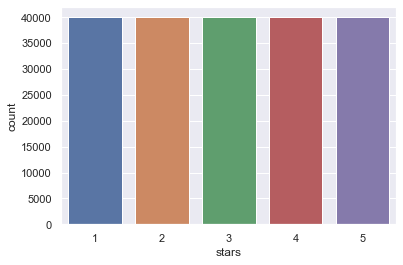

In [5]:
sns.countplot(data = dataset , x='stars')
#plt.show()

In [6]:
dataset = dataset.iloc[:,[4,5,3]]
dataset.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset.head()

,review_body,review_title,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,1
1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,1
2,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,1
3,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,1
4,Llega tarde y co la talla equivocada,Devuelto,1


In [7]:
stopwords = nltk.corpus.stopwords.words('spanish')
#stopwords

In [8]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')


In [15]:
dataset["ReviewConcat"] = dataset.review_title+ " " + dataset.review_body
dataset.head()

,review_body,review_title,stars,ReviewConcat
0,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,1,television Nevir Nada bueno se me fue ka panta...
1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,1,Dinero tirado a la basura con esta compra Horr...
2,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,1,solo llega una unidad cuando te obligan a comp...
3,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,1,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,Llega tarde y co la talla equivocada,Devuelto,1,Devuelto Llega tarde y co la talla equivocada


In [1]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list=[]
for review in dataset.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #review=re.sub("[^a-zA-Z]"," ",str(review))
    review=review.lower()
    review=re.sub("[^a-zA-ZáéíóúÁÉÍÓÚ]"," ",str(review))
   
    # Pasamos todo a minúsculas
    
    # Tokenizamos para separar las palabras del titular
    review=nltk.word_tokenize(review)

    # Eliminamos las palabras de menos de 2 letras
    review = [palabra for palabra in review if len(palabra)>3]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    #review = review.decode('utf8')
    #review=[(stemmer.stem(palabra)) for palabra in review]
    
    print(review)
    #review=[palabra for palabra in review]
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    #review_list.append(review)
    #dataset["titular_normalizado"] = titular_list

NameError: name 'dataset' is not defined

In [2]:
#review_list

In [11]:
dataset["review_stem"] = review_list
dataset.tail()

,review_body,review_title,stars,review_stem
199995,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,5,mando funciona perfectamente cumple todas func...
199996,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,5,compré batería cierta reticencia resultó fácil...
199997,Buena calidad. Satisfecha con la compra.,Buena calidad.,5,buena calidad satisfecha compra
199998,Perfecto para el cumple de mi hijo,Recomendado,5,perfecto cumple hijo
199999,"Súper bien! Las brochas son buenas, no sé meno...",Preciosas,5,súper bien brochas buenas menos caído pelitos ...


In [12]:
dataset.tail()
list_review_stem = list(dataset['review_stem'].values)
Calification = dataset['stars'].values

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [14]:
matriz_reviews = cou_vec.fit_transform(list_review_stem)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abajo', 'abierta', 'abierto', 'abre', 'abrir', 'absoluto', 'acaba', 'acabado', 'acabados', 'acabo', 'accesorios', 'aceite', 'aceptable', 'aconsejo', 'adapta', 'adaptador', 'adecuado', 'ademas', 'además', 'adhesivo', 'agarre', 'agradable', 'agua', 'aguanta', 'agujero', 'agujeros', 'ahora', 'aire', 'ajusta', 'ajustan', 'ajustar', 'ajuste', 'alguien', 'alguna', 'algún', 'alta', 'altavoz', 'alto', 'altura', 'amazon', 'ancho', 'anterior', 'anuncio', 'apaga', 'aparato', 'aparece', 'aparte', 'apenas', 'aplicación', 'apple']


In [15]:
x = matriz_reviews.toarray()
y = Calification

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
y_pred=nb.predict(xtest)
from sklearn.metrics import f1_score
F1_Score_NB= f1_score(ytest, y_pred, average='macro')
print("F1 Score NB= ",F1_Score_NB)

F1 Score NB=  0.34932952608227913


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 50, random_state=42)
rf.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
from sklearn.metrics import f1_score
F1_Score_forest= f1_score(ytest, y_pred, average='macro')
print("F1 Score RForest= ",F1_Score_forest)

F1 Score RForest=  0.4139436348677085


In [18]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1,max_iter=1000)
svc.fit(xtrain,ytrain)
y_pred=svc.predict(xtest)
from sklearn.metrics import f1_score
F1_Score_svc= f1_score(ytest, y_pred, average='macro')
print("F1 Score svc= ",F1_Score_svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 Score svc=  0.4435301993098129


In [19]:
y_pred=svc.predict(xtest)
from sklearn.metrics import f1_score
F1_Score_svc= f1_score(ytest, y_pred, average='macro')
print("F1 Score svc= ",F1_Score_svc)

F1 Score svc=  0.4435301993098129


In [20]:
print(ytest)
print(y_pred)


[1 1 2 ... 1 5 1]
[1 1 4 ... 1 3 2]


In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.plot(ytest[0:25],'r*',y_pred[0:25],'bs')
#plt.grid()
#plt.show()



NameError: name 'ytest' is not defined

In [22]:
review_list[8]

'esperando despues protestar varias veces solucion haceis caso dicen reembolso quiero auricular'

In [23]:
review_list[17]

'rompe muchísima facilidad'

In [ ]:
regresión me da
0-1.5 =  1
1.6 -2.5= 2
2.6 -3.4 = 3
3-5 - 4.4 =4
>4.4 = 5